# Handling Missing Data

# Handling Missing Numerical Data

In [2]:
# Mean or Median Imputation


# reading the titanic dataset to find columns that contain missing values. Then applying mean and median imputation

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [8,6]
sns.set_style("darkgrid")

titanic_data = sns.load_dataset("titanic")
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
#Filtering for numeric columns 

titanic_data = titanic_data[["survived","pclass","age","fare"]]
titanic_data.head()

,survived,pclass,age,fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [4]:
# To find the missing values first call the isnull method on titanic_data dataframe and then the mean() method

titanic_data.isnull().mean()

survived    0.000000
pclass      0.000000
age         0.198653
fare        0.000000
dtype: float64

In [5]:
#Looks like only age has missing values and the ratio of missing values is 19.86%

#Finding the mean and median values for all non-missing values in the age column

median = titanic_data.age.median()
print(median)

mean = titanic_data.age.mean()
print(mean)

28.0
29.69911764705882


In [6]:
# To plot kernel density plots for the actual age and median and mean age we will add columns to dataframe

import numpy as np

titanic_data["Median_Age"] = titanic_data.age.fillna(median)

titanic_data["Mean_Age"] = titanic_data.age.fillna(mean)

titanic_data["Mean_Age"] = np.round(titanic_data["Mean_Age"],1)

titanic_data.head(20)

,survived,pclass,age,fare,Median_Age,Mean_Age
0,0,3,22.0,7.2500,22.0,22.0
1,1,1,38.0,71.2833,38.0,38.0
2,1,3,26.0,7.9250,26.0,26.0
3,1,1,35.0,53.1000,35.0,35.0
4,0,3,35.0,8.0500,35.0,35.0
5,0,3,NaN,8.4583,28.0,29.7
6,0,1,54.0,51.8625,54.0,54.0
7,0,3,2.0,21.0750,2.0,2.0
8,1,3,27.0,11.1333,27.0,27.0
9,1,2,14.0,30.0708,14.0,14.0


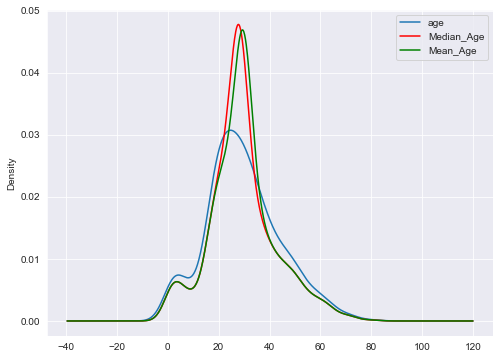

In [7]:
#Plotting the distribution of data for the age, Median_Age and Mean_Age columns

fig = plt.figure()
ax = fig.add_subplot(111)

titanic_data["age"].plot(kind="kde",ax=ax)
titanic_data["Median_Age"].plot(kind="kde",ax=ax,color="red")
titanic_data["Mean_Age"].plot(kind="kde",ax=ax,color="green")

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc="best")

In [8]:
# Performing end of tail imputation on the age column of the Titanic dataset

# Importing the titanic dataset and filtering for numeric columns 

titanic_data = sns.load_dataset("titanic")


titanic_data = titanic_data[["survived","pclass","age","fare"]]

titanic_data.isnull().mean()

survived    0.000000
pclass      0.000000
age         0.198653
fare        0.000000
dtype: float64

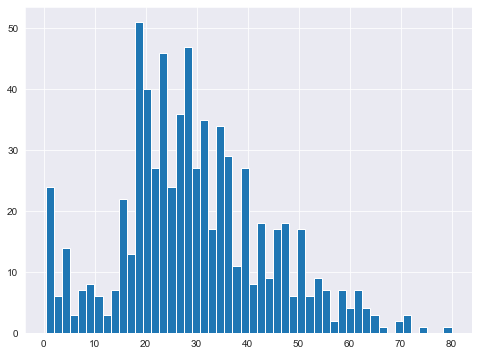

In [9]:
#Plotting the data distribution for the age column using a histogram

titanic_data.age.hist(bins=50)

In [10]:
#The output shows that the ahe column almost has a normal distribution so the end of the distribution value can be calculated
#by multiplying the mean value of the age column by three standard deviations

eod_value = titanic_data.age.mean() + 3 * titanic_data.age.std()
print(eod_value)

73.27860964406095


In [11]:
#Replacing the missing values in the age column with the end of tail value 

titanic_data["age_eod"] = titanic_data.age.fillna(eod_value)
titanic_data.head(20)

,survived,pclass,age,fare,age_eod
0,0,3,22.0,7.2500,22.00000
1,1,1,38.0,71.2833,38.00000
2,1,3,26.0,7.9250,26.00000
3,1,1,35.0,53.1000,35.00000
4,0,3,35.0,8.0500,35.00000
5,0,3,NaN,8.4583,73.27861
6,0,1,54.0,51.8625,54.00000
7,0,3,2.0,21.0750,2.00000
8,1,3,27.0,11.1333,27.00000
9,1,2,14.0,30.0708,14.00000


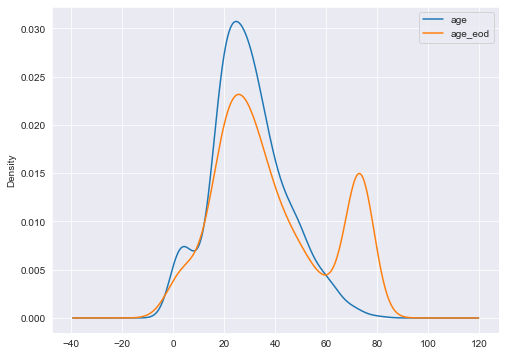

In [12]:
#Plotting the kernel density estimation plot for the original age column and age column with the end of distribution imputation

fig = plt.figure()
ax = fig.add_subplot(111)

titanic_data["age"].plot(kind="kde",ax=ax)
titanic_data["age_eod"].plot(kind="kde",ax=ax)

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc="best")

# Handling Missing Categorical Data

# Frequent Category Imputation

In [13]:
#re-loading the titanic dataset

titanic_data = sns.load_dataset("titanic")


#Filtering for only 3 columns "embark_town" , "age", "fare"

titanic_data = titanic_data[["embark_town","age","fare"]]

#Showing the columns with missing data

titanic_data.isnull().mean()

embark_town    0.002245
age            0.198653
fare           0.000000
dtype: float64

In [14]:
#We knew age had missing values from earlier but embark_town is also missing values and is categorical 

Text(0, 0.5, 'Number of Passengers')

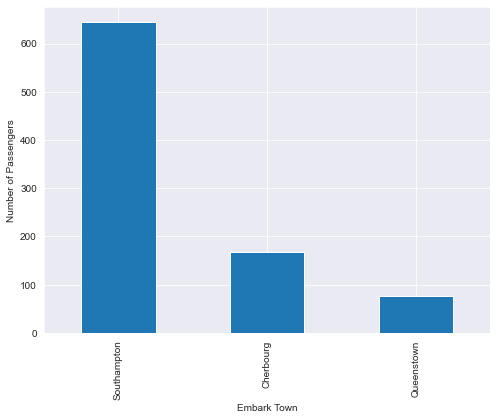

In [15]:
#Plotting a bar plot that shows each category in the embark_town column against the number of passengers


titanic_data.embark_town.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel("Embark Town")
plt.ylabel("Number of Passengers")

In [16]:
#from the graph above it looks like southhampton has the most but checking

titanic_data.embark_town.mode()

0    Southampton
dtype: object

In [17]:
#Replacing the missing values in embark town column with Southampton

titanic_data.embark_town.fillna("Southampton",inplace=True)

In [18]:
#Finding the mode of the age column and using it to replace the missing values in the age column

titanic_data.age.mode()

0    24.0
dtype: float64

In [19]:
titanic_data["age_mode"] = titanic_data.age.fillna(24)

titanic_data.head(20)

,embark_town,age,fare,age_mode
0,Southampton,22.0,7.2500,22.0
1,Cherbourg,38.0,71.2833,38.0
2,Southampton,26.0,7.9250,26.0
3,Southampton,35.0,53.1000,35.0
4,Southampton,35.0,8.0500,35.0
5,Queenstown,NaN,8.4583,24.0
6,Southampton,54.0,51.8625,54.0
7,Southampton,2.0,21.0750,2.0
8,Southampton,27.0,11.1333,27.0
9,Cherbourg,14.0,30.0708,14.0


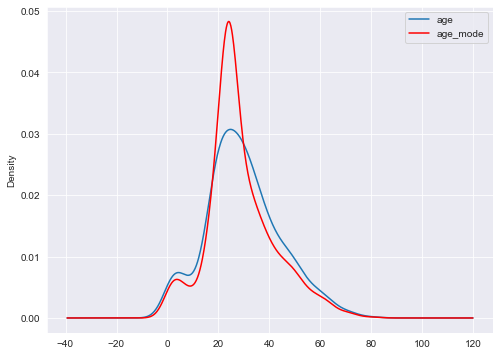

In [20]:
#Plotting the kernel density estimation plot for the original age column and the age column that contains the mode of the values
# in place of the missing values

fig = plt.figure()
ax = fig.add_subplot(111)

titanic_data["age"].plot(kind="kde",ax=ax)
titanic_data["age_mode"].plot(kind="kde",ax=ax,color="red")

lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc="best")

# Missing Category Imputation

In [22]:
#re-loading the titanic dataset

titanic_data = sns.load_dataset("titanic")


#Filtering for only 3 columns "embark_town" , "age", "fare"

titanic_data = titanic_data[["embark_town","age","fare"]]

#Showing the columns with missing data

titanic_data.isnull().mean()

embark_town    0.002245
age            0.198653
fare           0.000000
dtype: float64

In [23]:
# The table above shows that the embark_town column is a categorical column with missing values

# We will apply missing value imputation to the column

titanic_data.embark_town.fillna("Missing",inplace=True)

Text(0, 0.5, 'Number of Passengers')

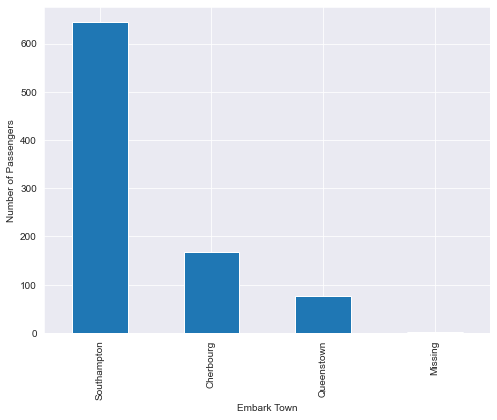

In [24]:
#After applying missing value imputation we plot the bar plot for the embark_town column 

titanic_data.embark_town.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel("Embark Town")
plt.ylabel("Number of Passengers")